In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def load_dataset():
    return pd.read_csv("https://storage.googleapis.com/qwasar-public/track-ds/boston.csv")
                       
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape, end="\n")
    print("First 10 rows of dataset:")
    pd.set_option('display.max_columns', None)
    display(dataset.head(10))
    #pd.reset_option('all')\n",
    print("\nStatistical summary:")
    display(dataset.describe())

print_summarize_dataset(load_dataset())

Dataset dimension:
(506, 14)
First 10 rows of dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9



Statistical summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
def clean_dataset(boston_dataframe):
    return boston_dataframe.dropna()
print("Cleaned DataFrame:")
print(load_dataset())

Cleaned DataFrame:
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MDEV  
0       15.3  396.90   4.98  24.0  
1       

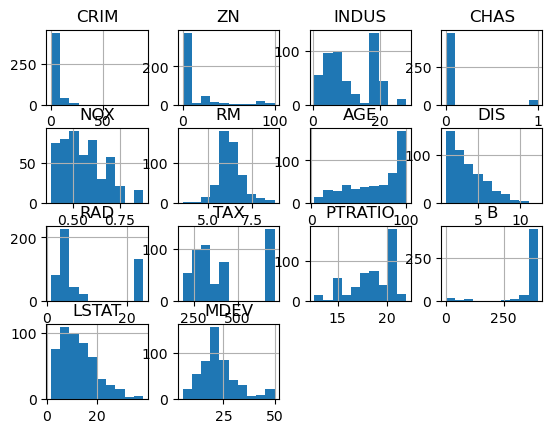

In [17]:
def print_histograms(boston_dataframe):
    boston_dataframe.hist()

print_histograms(load_dataset())

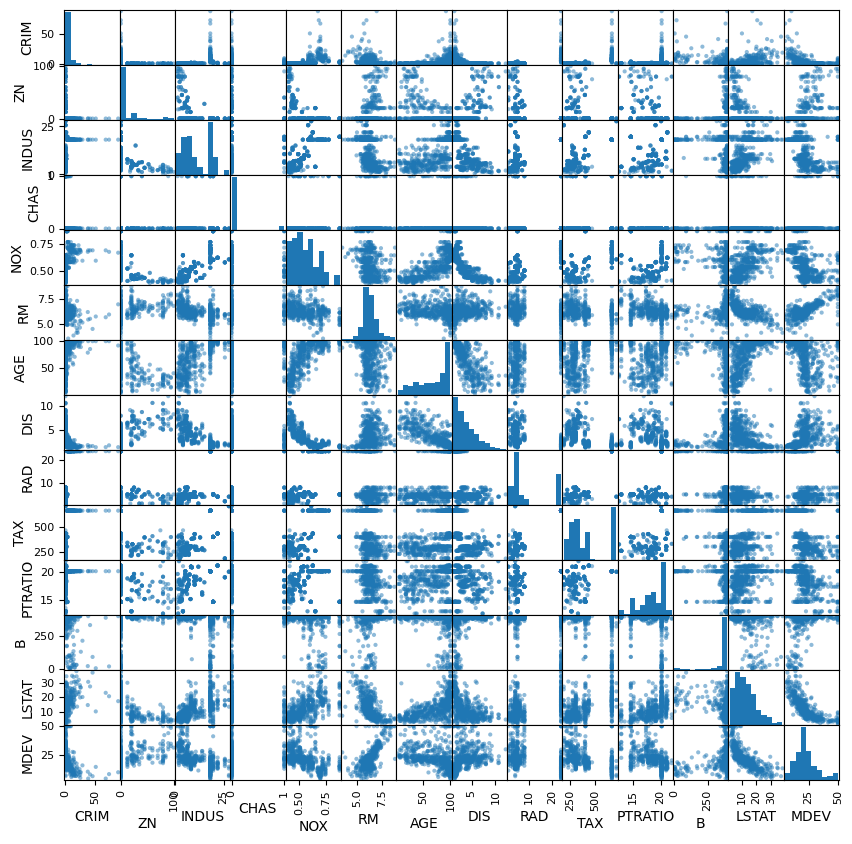

In [24]:
def print_scatter_matrix(boston_dataframe):
    pd.plotting.scatter_matrix(boston_dataframe, figsize=(10,10))
    plt.show()
    
print_scatter_matrix(load_dataset())

In [27]:
def compute_correlations_matrix(data):
    return data.corr(method="pearson")
correlations = compute_correlations_matrix(load_dataset())
print(correlations["MDEV"])

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


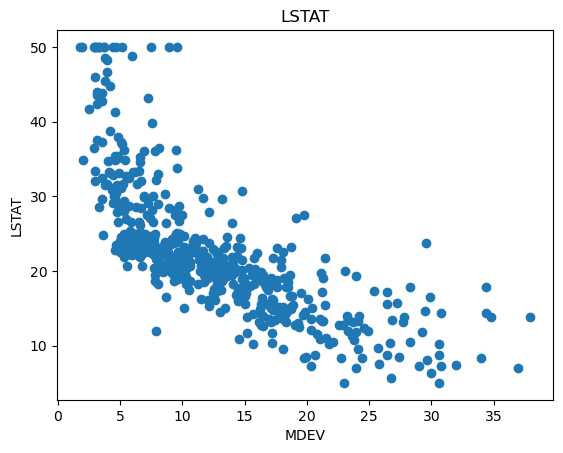

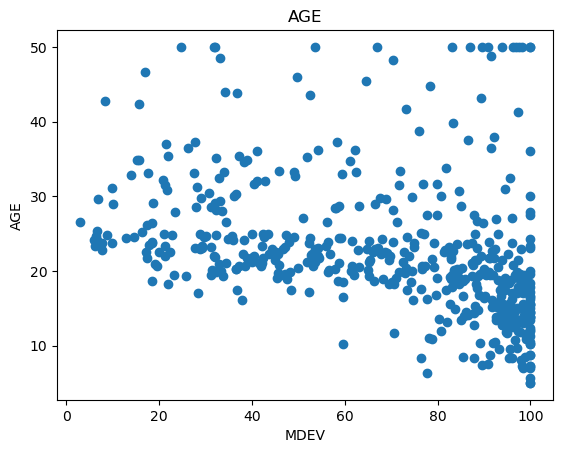

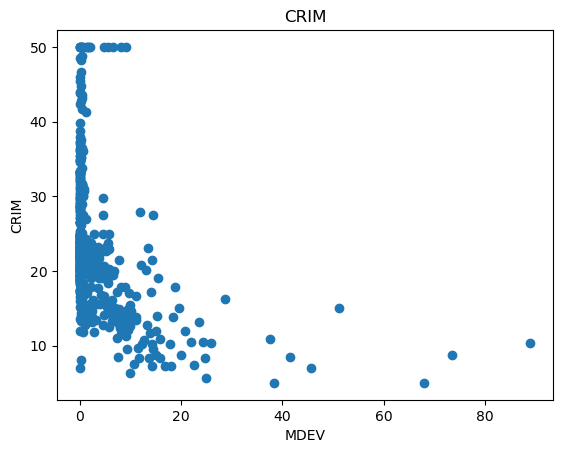

In [28]:
df = load_dataset()
plt.scatter(df["LSTAT"],df["MDEV"])
plt.xlabel("MDEV")
plt.ylabel("LSTAT")
plt.title("LSTAT")
plt.show()

plt.scatter(df["AGE"],df["MDEV"])
plt.xlabel("MDEV")
plt.ylabel("AGE")
plt.title("AGE")
plt.show()

plt.scatter(df["CRIM"],df["MDEV"])
plt.xlabel("MDEV")
plt.ylabel("CRIM")
plt.title("CRIM")
plt.show()

In [34]:
target_variable = 'LSTAT'
# compute_correlations_matrix(clean_data)

def boston_fit_model(boston_dataframe):
    model_dataset = boston_dataframe[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
    y = model_dataset.iloc[:, 1].values
    regressor. fit(x, y)
    return regressor

def boston_predict(estimator,data):
    predictions = estimator.predict(data)
    return predictions

def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', mean_absolute_error(y, predicted_values))
    print('Mean Squared Error:', mean_squared_error(y, predicted_values))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, predicted_values)))